# What is Churn Rate?

Churn rate is a metric used in the telecommunications industry to measure the rate at which customers stop doing business with a company over a specific period of time. 

It represents the percentage of customers who have terminated their relationship with a company, typically by canceling their service or switching to another provider, in a given time period, such as a month or a year.

A high churn rate can be indicative of customer dissatisfaction, poor customer service, or intense competition in the industry, while a low churn rate can suggest a loyal customer base and successful customer retention strategies. 

Understanding and predicting churn rate can be crucial for companies to retain customers, optimize their marketing efforts, and improve their profitability.

In [1]:
#Importing the necessary libraries
import math
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import warnings 
warnings.simplefilter('ignore')
from collections import Counter

#Data preprocessing
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,OneHotEncoder,StandardScaler

#For modeling
import xgboost as xgb
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,f1_score,recall_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, roc_curve,roc_auc_score


In [2]:
df = pd.read_csv("C:/Users/Aditya/Desktop/BSE PGPDA/SEM 2/Indrani - Regression and Classification of Business Applications/Telecom Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
print(df.shape)
print(df.info())
df.head()

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
(df.isna().sum()).sort_values()

customerID          0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
TotalCharges        0
OnlineBackup        0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
OnlineSecurity      0
Churn               0
dtype: int64

In [5]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# 1) EDA & Data Cleaning

In [6]:
Churn = df[df["Churn"]=="Yes"]
non_churn = df[df["Churn"]=="No"]

# I will simply run a loop to make countplots for all the categorical variables and sort them on the basis of Churn and list my observations

In [7]:
def display_countplots(df):
    for col in df.columns:
        if col != ['Churn'] and df[col].nunique() <= 4:
            plt.figure(figsize=(8,4))
            sns.countplot(col, data=df, hue='Churn')
            plt.title('Churn Count by {}'.format(col))
            plt.xlabel(col)
            plt.ylabel('Count')
            for p in plt.gca().patches:
                plt.gca().annotate(format(p.get_height(), '.0f'),(p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10),textcoords='offset points')

In [8]:
df1 = df

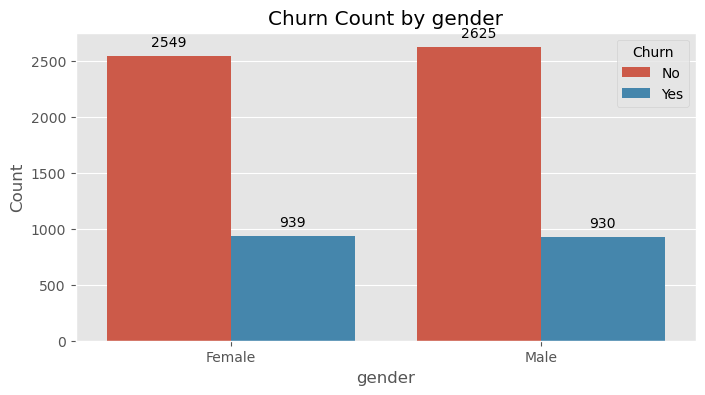

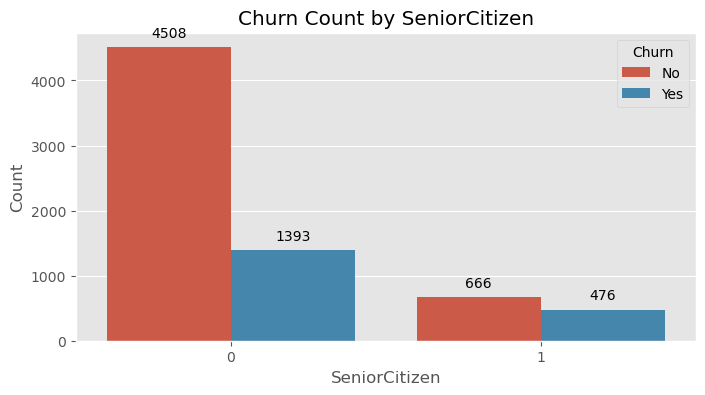

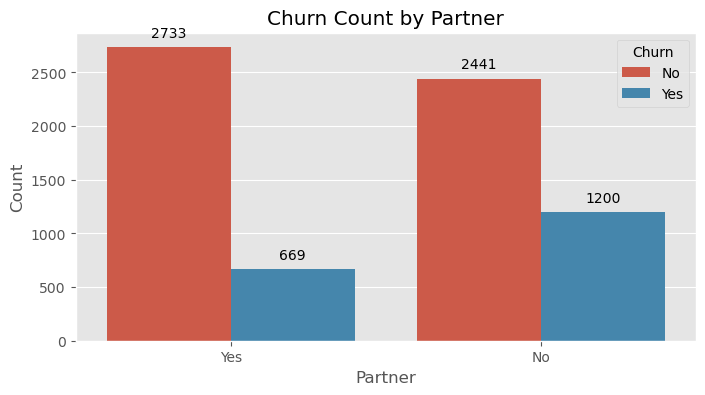

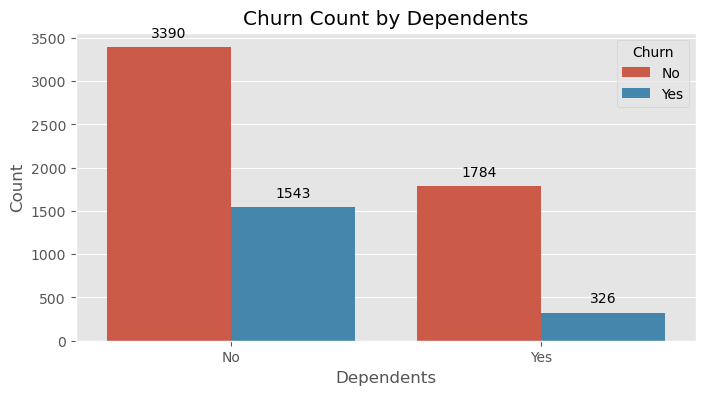

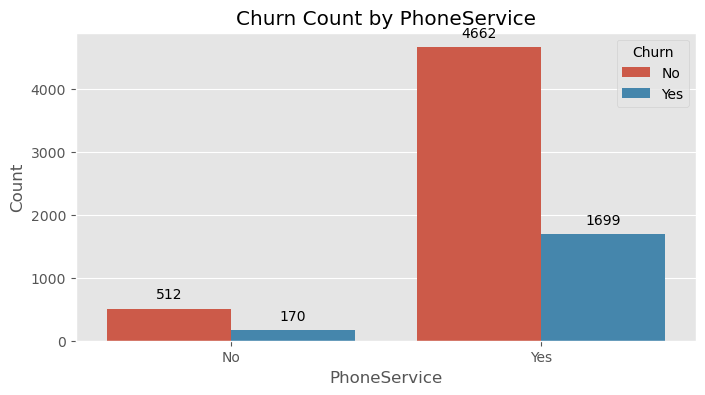

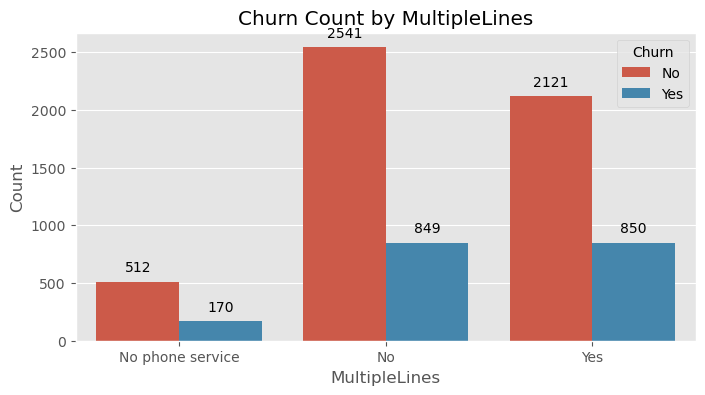

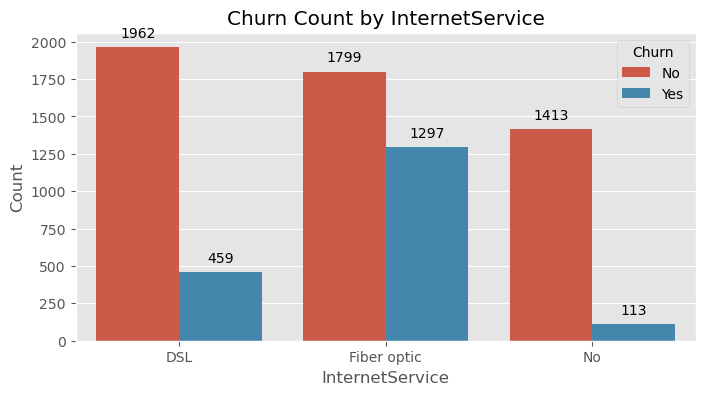

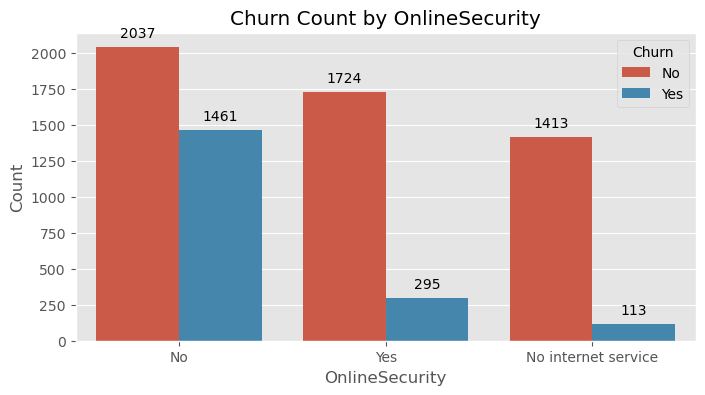

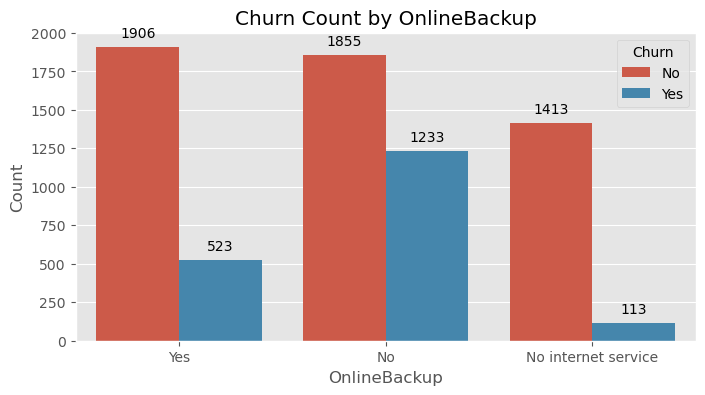

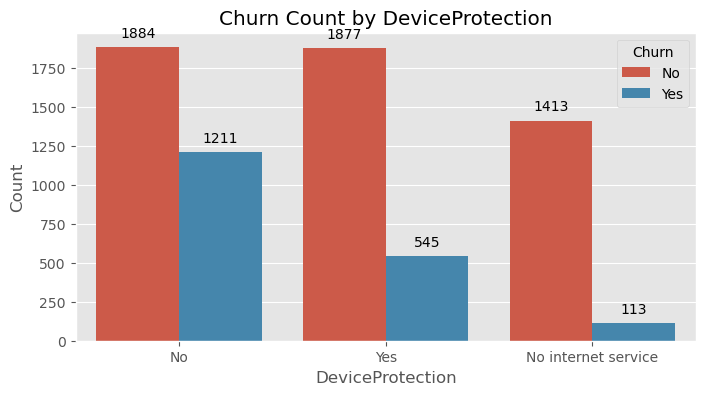

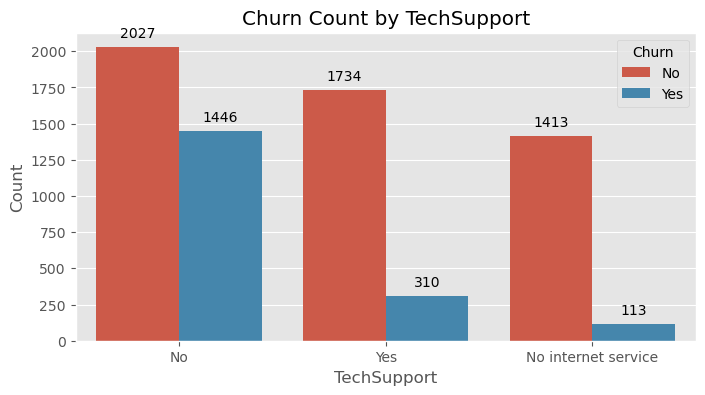

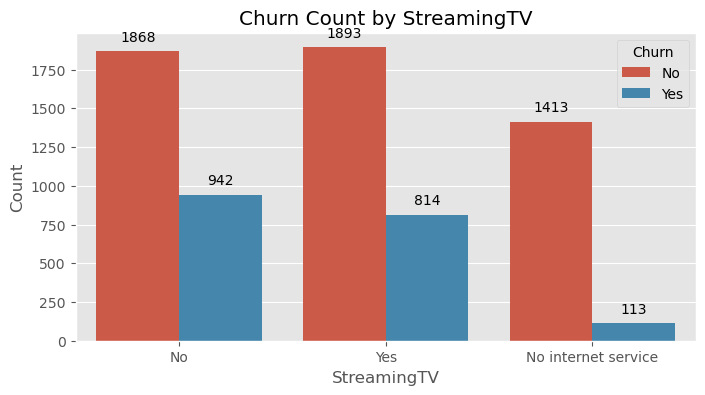

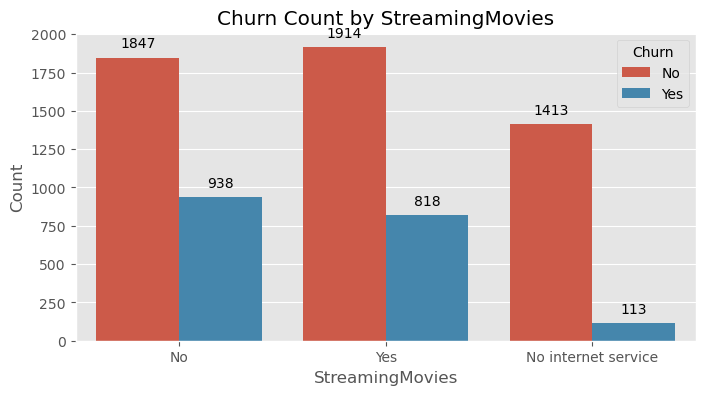

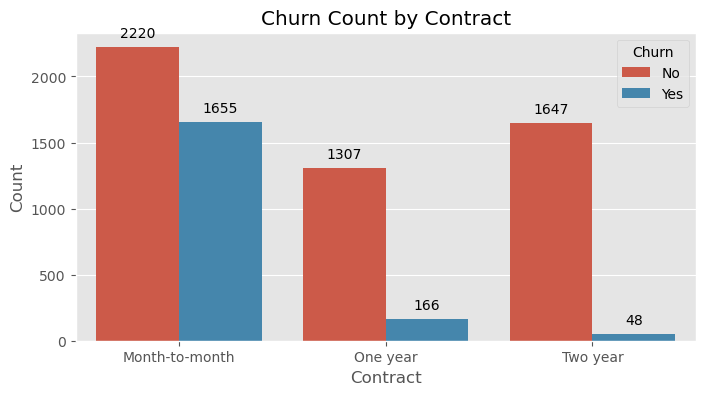

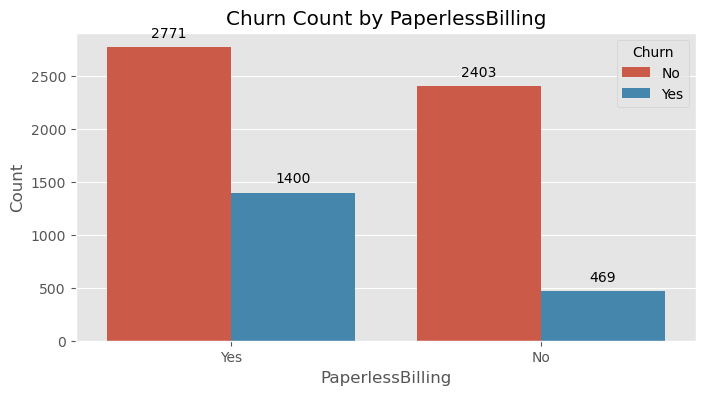

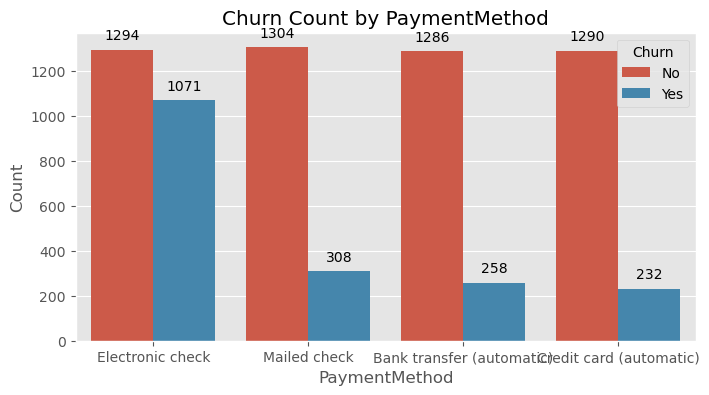

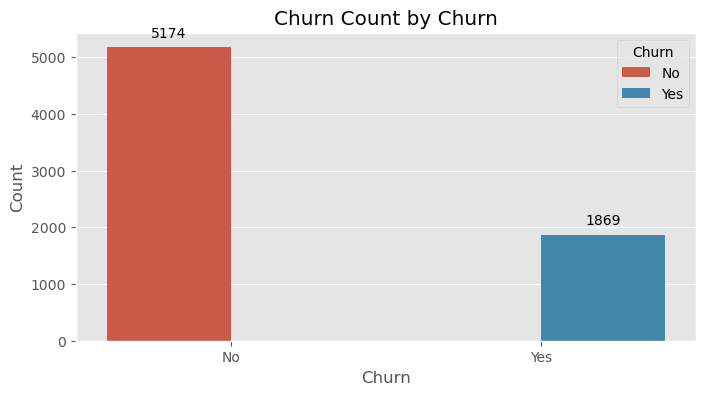

In [9]:
display_countplots(df1)

In [10]:
total_cust = len(df["customerID"])
churn = len(df1[df1["Churn"]=='Yes']) 
churn_rate = (churn/total_cust)*100

In [11]:
print("The current Churn Rate for the company is: ", round(churn_rate,2),'%')

The current Churn Rate for the company is:  26.54 %


Key Takeaways

Churn X Gender: No pattern visible

Churn X SeniorCitizen: They seem to be loyal to the company

Churn X Partner: The proportion of Churn is higher amongst subsicribers who do not have a partner

Churn X Dependents: Subscriber with dependents tend to Churn lesser.

Churn X Phone Service: No pattern visible

Churn X Multiple Lines (Phone): Subsribers with Multiple Lines have a higher proportion of Churn

Churn X Internet Service: It seems that the cutomers with Fiber Optic Connections seem to have the worst retention ratio

Churn X Online Security: Internet Service Subscribers with Online Security have much lesser Churn than the ones who do not.

Churn X Online Backup: Internet Service Subscribers with Online Backup have much lesser Churn than the ones who do not.

Churn X Device Protection: Internet Service Subscribers with Device Protection have much lesser Churn than the ones who do not.

Churn X Tech Support: Internet Service Subscribers with Tech Support have much lesser Churn than the ones who do not.

Churn X Streaming TV:  Internet Service Subscribers with Streaming TV have sliglty lesser Churn than the ones who do not.

Churn X Streaming Movies:  Internet Service Subscribers with Streaming Movies have sliglty lesser Churn than the ones who do not.

Churn X Contract: The subscribres with Annual plans tend to be much more loyal than subscribers of monthly plans.

Churn X Paperless Billing: It seems that subscriber who get Paper bills tend to be much more sticky.

Churn X Payment Method: The churn seems to be highest amongst subscribers who make payments through Electronic Check



In [13]:
#The Total Charges column was in object for so I tried simply multiplying Monthly Charges with tenure
df1['Total_Charges'] = df1['MonthlyCharges'] * df1['tenure']

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Total_Charges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1936.30
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1903.50
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.40


In [15]:
#The values do not seem to match so I tried Typecasting and found there was a blank space, 
# so replaced it with np.nan and typecasted it to float

In [16]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [17]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [18]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [19]:
# Dropped the newly created total charges with multiplication and Customer ID

In [20]:
df1 = df.drop(['customerID', 'Total_Charges'],axis=1)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [22]:
df1['MonthlyCharges'] = df1['MonthlyCharges'].fillna(df1['MonthlyCharges'].median())

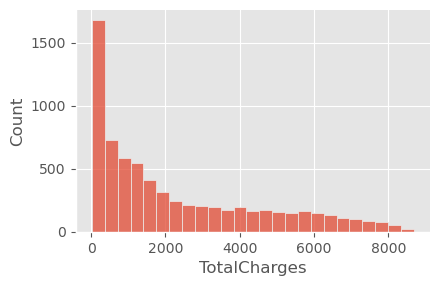

In [23]:
sns.displot(df1['TotalCharges'], height=3, aspect=1.5)

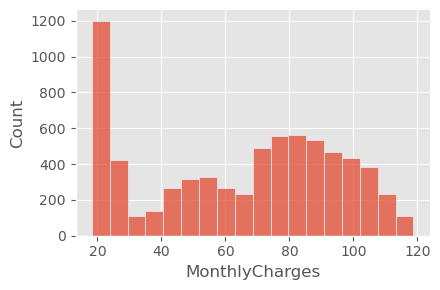

In [24]:
sns.displot(df1['MonthlyCharges'], height=3, aspect=1.5)

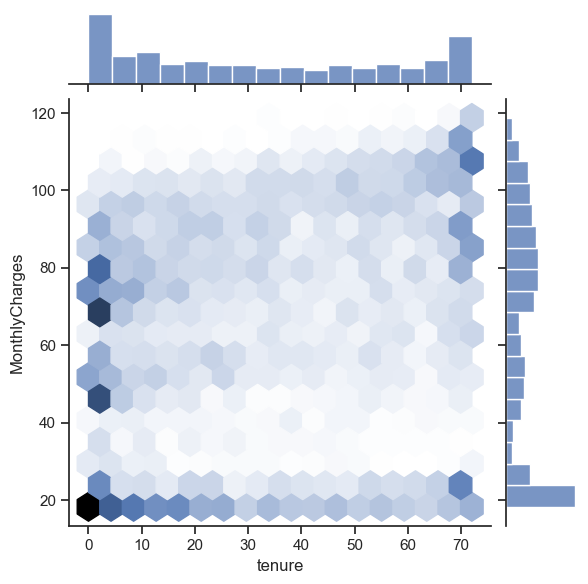

In [25]:
#Tenure V/s Monthly Charges

sns.set(style="ticks")
x = df1['tenure']
y = df1['MonthlyCharges']
sns.jointplot(x, y, kind='hex')

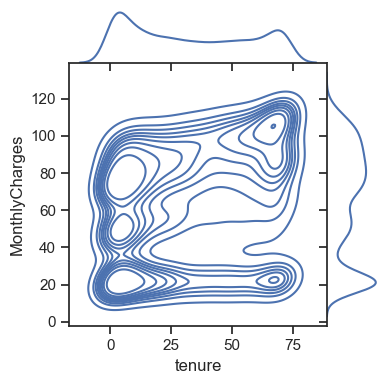

In [26]:
sns.jointplot(x, y, kind="kde",height=4, space=0)

# A 'Hex' & 'KDE' jointplot reduces the noise and shows us the area of intensity
## Here we can deduce that there is enough reach of the service to people across the board in terms of monthly charges
## The problem seems to be customer retention
## The services provided by the company in the 30-40 price range is redundant as there is no stickiness to that service
## Subscribers either with more of the services (Price 80-120) or the basic service(20-30) diplay the most stickiness
## Subscribers in the 100 price point are seem to represent then least Churn

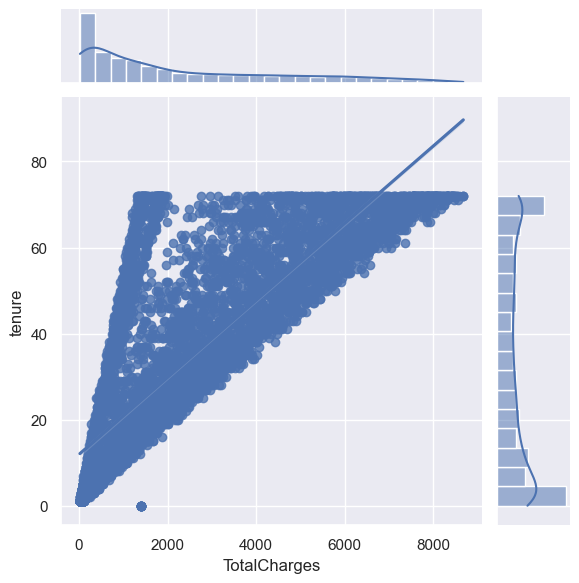

In [27]:
sns.set(style="darkgrid")
sns.jointplot("TotalCharges", "tenure",kind ='reg',data=df1, height=6)

# From the tenure and Total Charges jointplot we can yet again determine that the churn rate seems to be least amongst the extreme price points. 

## The LTV achieved from higher priced services seems to be the maximum

# 2) Data Transformation

In [28]:
def divide_columns_by_datatype(df, col_list):
    obj_cols = []
    num_cols = []
    for col in col_list:
        if df[col].dtype == 'object':
            obj_cols.append(col)
        else:
            num_cols.append(col)
    return obj_cols, num_cols

In [29]:
divide_columns_by_datatype(df1,df1.columns)

(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Churn'],
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'])

In [30]:
obj_cols = ['gender','Partner','Dependents','PhoneService','MultipleLines',
  'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
  'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
obj_dict = ['one-hot','one-hot','one-hot','one-hot','one-hot','one-hot','one-hot','one-hot','one-hot','one-hot',
            'one-hot','one-hot','one-hot','one-hot','one-hot','label']

In [31]:
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
num_dict = ['none','none','none','none']

In [32]:
def create_col_encoding_dict(col_names, encodings):
    """
    Creates a dictionary where the keys are column names and values are the type of encoding.
    
    Args:
        col_names (list): List of column names to encode.
        encodings (list): List of encoding types corresponding to the column names.
                          Should be either 'one-hot' or 'ordinal'.
    
    Returns:
        dict: A dictionary where the keys are column names and values are the type of encoding.
    """
    # Create a dictionary where the keys are column names and values are encoding types
    col_encoding = {col_names[i]: encodings[i] for i in range(len(col_names))}
    
    return col_encoding

In [33]:
obj_enc_dict = create_col_encoding_dict(obj_cols,obj_dict)

In [34]:
num_enc_dict = create_col_encoding_dict(num_cols,num_dict)

In [35]:
def encode_columns(df, col_encoding):
    """
    Function to one-hot or ordinal encode specified columns in a dataframe.

    Parameters:
    df (pandas.DataFrame): the dataframe to encode
    col_encoding (dict): a dictionary where the keys are the names of columns to encode, and the values are the type of encoding ('one-hot', 'ordinal','label' or 'none')

    Returns:
    encoded_df (pandas.DataFrame): the encoded dataframe
    """

    # Make a copy of the original dataframe
    encoded_df = df.copy()

    # Loop over the columns to encode
    for col, encoding_type in col_encoding.items():

        # One-hot encode the column
        if encoding_type == 'one-hot':
            encoder = OneHotEncoder(sparse=False, drop='first')
            encoded_col = encoder.fit_transform(encoded_df[[col]])
           
            # Create a dataframe from the encoded column
            encoded_col_df = pd.DataFrame(encoded_col, columns=[f"{col}_{i}" for i in range(encoded_col.shape[1])])
            # Add the encoded columns to the dataframe and drop the original column
            encoded_df = pd.concat([encoded_df, encoded_col_df], axis=1).drop(col, axis=1)

        # Ordinal encode the column
        elif encoding_type == 'ordinal':
            encoder = OrdinalEncoder()
            encoded_col = encoder.fit_transform(encoded_df[[col]])
            encoded_df[col] = encoded_col

        # Label encode the column
        elif encoding_type == 'label':
            encoder = LabelEncoder()
            encoded_col = encoder.fit_transform(encoded_df[[col]])
            encoded_df[col] = encoded_col
            
        # Keep the original column values as they are
        elif encoding_type == 'none':
            continue

    return encoded_df

In [36]:
df_obj_enc = encode_columns(df1,obj_enc_dict)

In [37]:
df_enc = encode_columns(df_obj_enc,num_enc_dict) 

In [38]:
df_enc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_0,Partner_0,Dependents_0,PhoneService_0,MultipleLines_0,MultipleLines_1,InternetService_0,InternetService_1,OnlineSecurity_0,OnlineSecurity_1,OnlineBackup_0,OnlineBackup_1,DeviceProtection_0,DeviceProtection_1,TechSupport_0,TechSupport_1,StreamingTV_0,StreamingTV_1,StreamingMovies_0,StreamingMovies_1,Contract_0,Contract_1,PaperlessBilling_0,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2
0,0,1,29.85,29.85,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2,53.85,108.15,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,45,42.30,1840.75,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Train Test split

In [39]:
X = df_enc.drop("Churn",axis = 1)
Y = df_enc["Churn"]

In [40]:
Y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify=Y,test_size=0.3,random_state=0)

# 3) Training a model

# Logistic Regression

Training Accuracy:  0.8119675456389452
Testing Accuracy:  0.7969711310932324
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

[[1386  166]
 [ 263  298]] : Confusion Matrix


Text(0.5, 1.0, 'Confusion matrix')

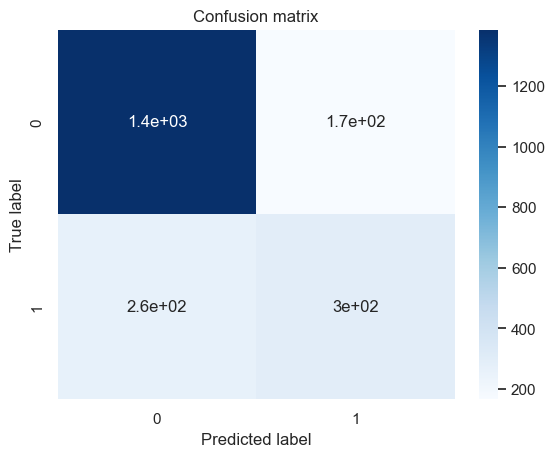

In [96]:
model=LogisticRegression().fit(X_train,Y_train)

Y_pred = model.predict(X_test)
Y_pred_prob = model.predict_proba(X_test)[:,1]

train_acc = accuracy_score(Y_train, model.predict(X_train))
test_acc = accuracy_score(Y_test, Y_pred)
clf_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test,Y_pred)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)
print("Classification Report: \n", clf_report)
print(cm, ": Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')

Text(0.5, 1.0, 'Logistic Regression Predictions')

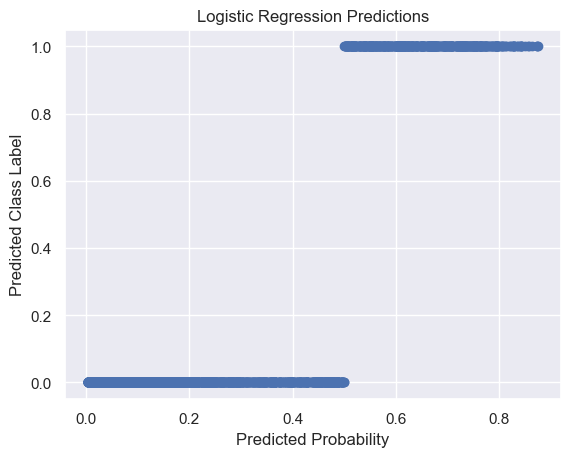

In [43]:
plt.scatter(Y_pred_prob, Y_pred)
plt.xlabel("Predicted Probability")
plt.ylabel("Predicted Class Label")
plt.title("Logistic Regression Predictions")

# KNN

In [46]:
#selecting the optimal value of k
params = {"n_neighbors":range(1,21)}
gsv=GridSearchCV(KNeighborsClassifier(),params).fit(X_train,Y_train)

print("The optimum number of neighbors are :",gsv.best_params_)
print("The best score is :",gsv.best_score_)

The optimum number of neighbors are : {'n_neighbors': 15}
The best score is : 0.7789046653144016


Training Accuracy:  0.8032454361054767
Testing Accuracy:  0.7827733080927591
Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      1552
           1       0.63      0.43      0.51       561

    accuracy                           0.78      2113
   macro avg       0.72      0.67      0.69      2113
weighted avg       0.77      0.78      0.77      2113

[[1414  138]
 [ 321  240]] : Confusion Matrix


<AxesSubplot:>

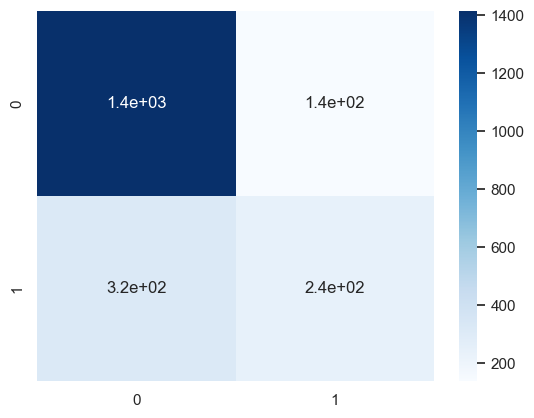

In [47]:
#KNN 
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

Y_pred = knn.predict(X_test)
Y_pred_proba = knn.predict_proba(X_test)[:,1]

train_acc = accuracy_score(Y_train, knn.predict(X_train))
test_acc = accuracy_score(Y_test, Y_pred)
clf_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test,Y_pred)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)
print("Classification Report \n",clf_report)
print(cm, ": Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="Blues")

# Decision Tree Classifier

In [48]:
# Define Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Define the hyperparameters to search
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Define the GridSearchCV object
grid_search = GridSearchCV(estimator=dtc, param_grid=params, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Training Accuracy:  0.7898580121703854
Testing Accuracy:  0.791292001893043
Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      1552
           1       0.68      0.41      0.51       561

    accuracy                           0.79      2113
   macro avg       0.75      0.67      0.69      2113
weighted avg       0.78      0.79      0.77      2113

[[1443  109]
 [ 332  229]] : Confusion Matrix


<AxesSubplot:>

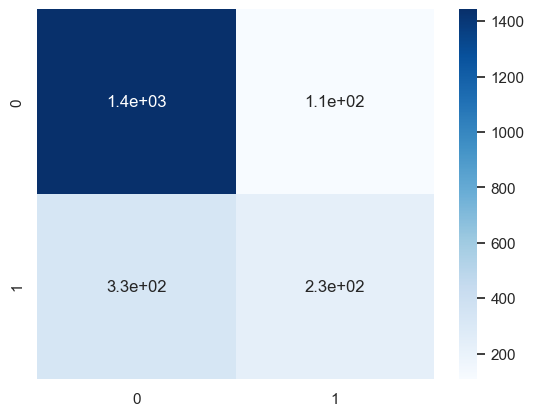

In [49]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=2,min_samples_leaf=1, min_samples_split=2)

dtc.fit(X_train,Y_train)
dtc.score(X_test,Y_test)

Y_pred = dtc.predict(X_test)
Y_pred_proba = dtc.predict_proba(X_test)[:,1]

train_acc = accuracy_score(Y_train, dtc.predict(X_train))
test_acc = accuracy_score(Y_test, Y_pred)
clf_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test,Y_pred)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)
print("Classification Report \n",clf_report)
print(cm, ": Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="Blues")

Text(0.5, 1.0, 'Decision tree\n ROC curve = 0.7668725995552861')

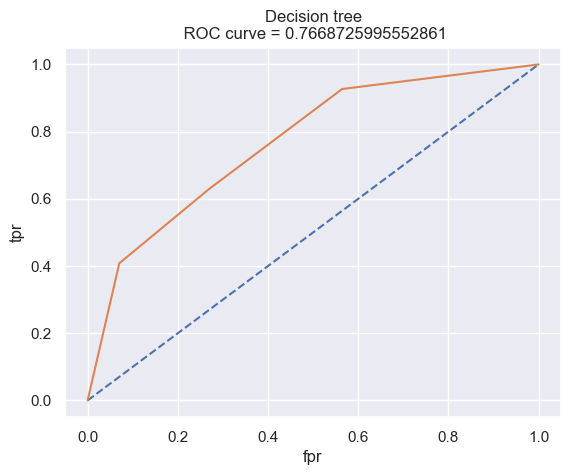

In [50]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr, label='Dt')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Decision tree\n ROC curve = ' + str(roc_auc_score(Y_test,Y_pred_proba)))

# Random Forest Classifier

In [51]:
rfc=RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

In [52]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

Training Accuracy:  0.8103448275862069
Testing Accuracy:  0.8054898248935163
Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1552
           1       0.69      0.49      0.57       561

    accuracy                           0.81      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.81      0.79      2113

[[1428  124]
 [ 287  274]] : Confusion Matrix


<AxesSubplot:>

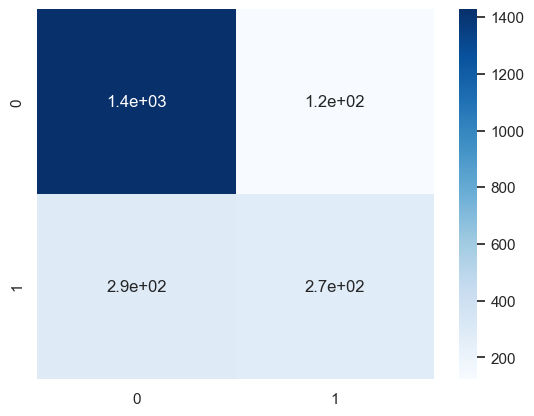

In [53]:
rfc = RandomForestClassifier(criterion='gini', n_estimators=200,max_depth=6,max_features=6)

rfc.fit(X_train,Y_train)
rfc.score(X_test,Y_test)

Y_pred = rfc.predict(X_test)
Y_pred_proba = rfc.predict_proba(X_test)[:,1]

train_acc = accuracy_score(Y_train, rfc.predict(X_train))
test_acc = accuracy_score(Y_test, Y_pred)
clf_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test,Y_pred)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)
print("Classification Report \n",clf_report)
print(cm, ": Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="Blues")

Text(0.5, 1.0, 'Random Forest\n ROC curve = 0.8477044168182736')

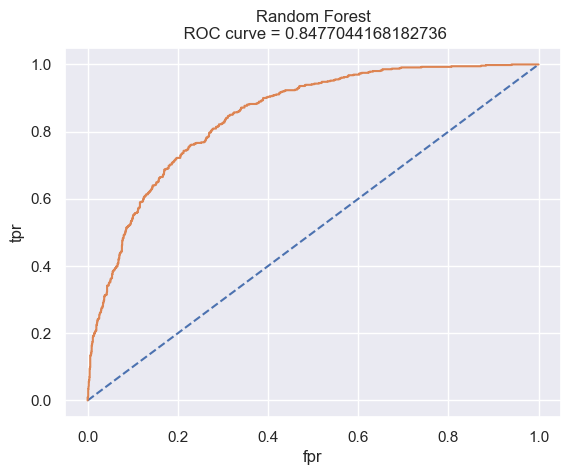

In [54]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr, label='Rf')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest\n ROC curve = ' + str(roc_auc_score(Y_test,Y_pred_proba)))

# Support Vector Machine (SVM)

In [55]:
# Define the SVM model
svm = SVC()

# Define the hyperparameters to search
params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(estimator=svm, param_grid=params, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Training Accuracy:  0.734685598377282
Testing Accuracy:  0.73450070989115
Classification Report 
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113

[[1552    0]
 [ 561    0]] : Confusion Matrix


<AxesSubplot:>

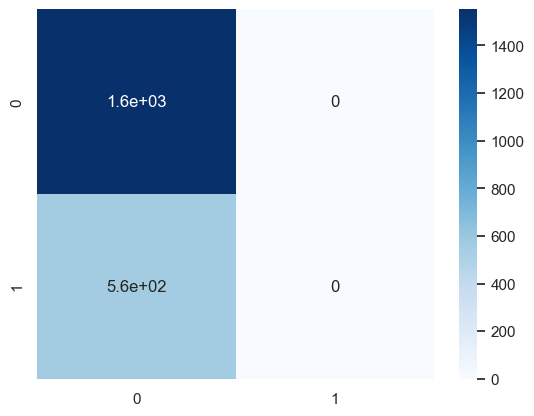

In [56]:
# Define the SVM model with the best parameters
svm = SVC(probability=True)

# Fit the SVM model to the training data
svm.fit(X_train, Y_train)

Y_pred = svm.predict(X_test)
Y_pred_proba = svm.predict_proba(X_test)[:,1]


train_acc = accuracy_score(Y_train, svm.predict(X_train))
test_acc = accuracy_score(Y_test, Y_pred)
clf_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

# Print the training and testing accuracies, classification report, and confusion matrix
print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)
print("Classification Report \n", clf_report)
print(cm, ": Confusion Matrix")

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues")

Text(0.5, 1.0, 'SVM\n ROC curve = 0.8016698596026978')

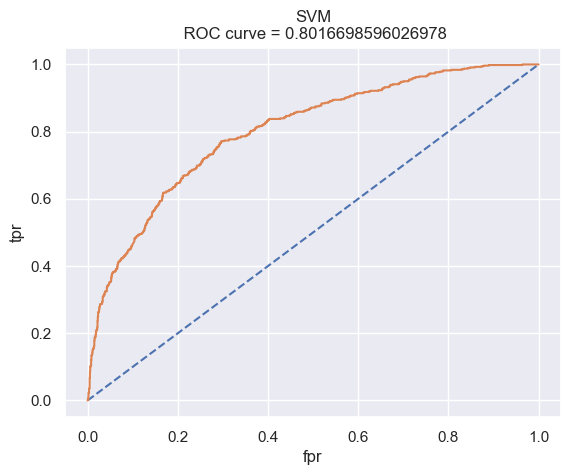

In [57]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr, label='svm')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('SVM\n ROC curve = ' + str(roc_auc_score(Y_test,Y_pred_proba)))

# Naive Bayes

In [58]:
nb = GaussianNB()

params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(estimator=nb, param_grid=params, cv=5)
grid_search.fit(X_train, Y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'var_smoothing': 1e-05}
Best score: 0.7647058823529412


Training Accuracy:  0.7647058823529411
Testing Accuracy:  0.7666824420255561
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1552
           1       0.56      0.57      0.56       561

    accuracy                           0.77      2113
   macro avg       0.70      0.70      0.70      2113
weighted avg       0.77      0.77      0.77      2113

[[1300  252]
 [ 241  320]] : Confusion Matrix


<AxesSubplot:>

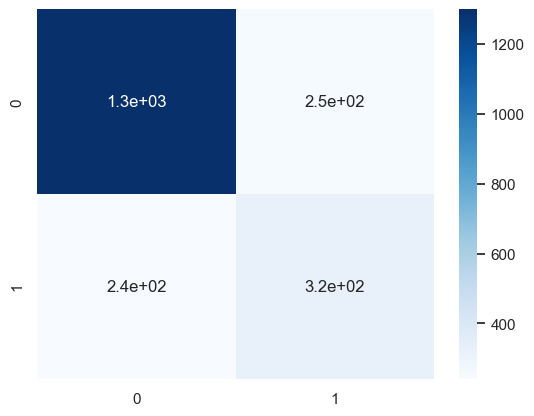

In [59]:
nb = GaussianNB(var_smoothing=1e-05)
nb.fit(X_train, Y_train)

Y_pred = nb.predict(X_test)
Y_pred_proba = nb.predict_proba(X_test)[:,1]

train_acc = accuracy_score(Y_train, nb.predict(X_train))
test_acc = accuracy_score(Y_test, Y_pred)
clf_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)
print("Classification Report \n", clf_report)
print(cm, ": Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="Blues")

Text(0.5, 1.0, 'Naive Bayes\n ROC curve = 0.7810042128378999')

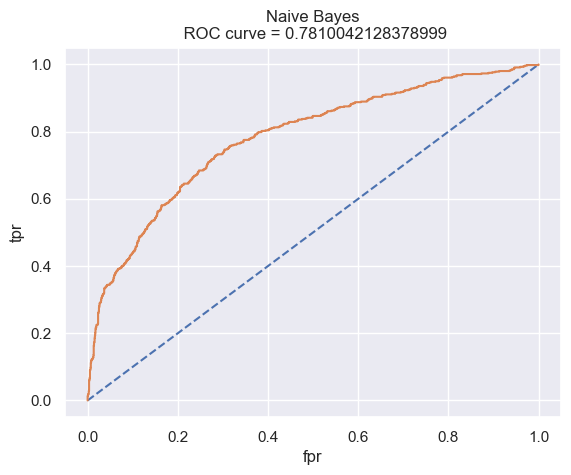

In [60]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr, label='nb')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayes\n ROC curve = ' + str(roc_auc_score(Y_test,Y_pred_proba)))

# 4) Comparing all the models

In [62]:
reg_pipeline = Pipeline([('Logreg',LogisticRegression(random_state=100))])
knn_pipeline=Pipeline([('knn',KNeighborsClassifier(n_neighbors=15))])
dtree_pipeline = Pipeline([('dtree',DecisionTreeClassifier(random_state=100,criterion='gini', max_depth=2,min_samples_leaf=1, min_samples_split=2))])
rf_pipeline = Pipeline([('Random Forest',RandomForestClassifier(criterion='gini', n_estimators= 200, max_depth=6,max_features=6,random_state=100))])
svm_pipeline = Pipeline([('Support Vector Machine',SVC(probability=True))])
nb_pipeline = Pipeline([('Naive Bayes',GaussianNB(var_smoothing=1e-05))])

In [63]:
my_pipeline = [reg_pipeline,knn_pipeline,dtree_pipeline,rf_pipeline,svm_pipeline,nb_pipeline]

In [64]:
model_list = []
pred_list = []
trn_acc = []
test_acc = []
roc_auc = []  # create a new list to store ROC AUC scores

for model in my_pipeline:
    mod = model.fit(X_train, Y_train)
    model_list.append(mod)
    p_tr = model.predict(X_train)
    trn_acc.append(accuracy_score(Y_train, p_tr))
    p_test = model.predict(X_test)
    test_acc.append(accuracy_score(Y_test, p_test))
    # calculate ROC AUC score for the current model and add it to the list
    roc_auc.append(roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))

In [65]:
output = pd.DataFrame({"model_name":model_list,"Train Accuracy":trn_acc,"Test Accuracy":test_acc,"ROC AUC score":roc_auc})

In [66]:
output

,model_name,Train Accuracy,Test Accuracy,ROC AUC score
0,(LogisticRegression(random_state=100)),0.811968,0.796971,0.843032
1,(KNeighborsClassifier(n_neighbors=15)),0.803245,0.782773,0.782905
2,"(DecisionTreeClassifier(max_depth=2, random_st...",0.789858,0.791292,0.766873
3,"((DecisionTreeClassifier(max_depth=6, max_feat...",0.812576,0.802650,0.847374
4,(SVC(probability=True)),0.734686,0.734501,0.801685
5,(GaussianNB(var_smoothing=1e-05)),0.764706,0.766682,0.781004


In [105]:
model_list

[Pipeline(steps=[('Logreg', LogisticRegression(random_state=100))]),
 Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=15))]),
 Pipeline(steps=[('dtree',
                  DecisionTreeClassifier(max_depth=2, random_state=100))]),
 Pipeline(steps=[('Random Forest',
                  RandomForestClassifier(max_depth=6, max_features=6,
                                         n_estimators=200, random_state=100))]),
 Pipeline(steps=[('Support Vector Machine', SVC(probability=True))]),
 Pipeline(steps=[('Naive Bayes', GaussianNB(var_smoothing=1e-05))])]

## The fourth Model Random Forest provides us with the best score in all aspects

In [45]:
Counter(Y_train)

Counter({1: 1308, 0: 3622})

# The target variable is imbalanced, I will attempt SMOTE to check if we can improve the accuracy by adressing the imbalance

# 5) Balancing the target variable and then training the model

In [67]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [69]:
x_resample,y_resample=SMOTE(sampling_strategy=1,k_neighbors=3).fit_resample(X_train,Y_train)

In [72]:
print(Counter(Y_train))
print(Counter(y_resample))

Counter({0: 3622, 1: 1308})
Counter({1: 3622, 0: 3622})


In [73]:
#initialising the oversampler and undersampler with default parameters
over = SMOTE()
under = RandomUnderSampler()

In [74]:
#initialising the pipelines with resampled data using SMOTE
smote_pipeline_reg = Pipeline([('over', over), ('under', under),('Logreg',LogisticRegression(random_state=100))])
smote_pipeline_knn = Pipeline([('over', over), ('under', under), ('knn',KNeighborsClassifier(n_neighbors=15))])
smote_pipeline_dtree = Pipeline([('over', over), ('under', under), ('model',DecisionTreeClassifier(random_state=100,criterion='gini', max_depth=2,min_samples_leaf=1, min_samples_split=2))])
smote_pipeline_rf = Pipeline([('over', over), ('under', under), ('model',RandomForestClassifier(criterion='gini', n_estimators= 200, max_depth=6,max_features=6,random_state=100))])
smote_svm_pipeline = Pipeline([('over', over), ('under', under),('Support Vector Machine',SVC(probability=True))])
smote_nb_pipeline = Pipeline([('over', over), ('under', under),("nb",GaussianNB(var_smoothing=1e-05))])


In [75]:
my_smote_pipeline=[smote_pipeline_reg,smote_pipeline_knn,smote_pipeline_dtree,smote_pipeline_rf,smote_svm_pipeline,smote_nb_pipeline]

In [77]:
params={}
j=0
for i in my_smote_pipeline:
    param_grid = {'over__sampling_strategy':[ 0.25, .5, .75,1],
                  "over__k_neighbors":range(3,11),"under__sampling_strategy":[ 0.25, .5, .75,1]}
    
    #creating gidsearchCV model with the list of parameters
    grid_search = GridSearchCV(estimator=i,
                           param_grid=param_grid,
                           scoring='f1',cv=3)
    grid_search.fit(X_train,Y_train)
    #selecting best parameter and storing in a dictionary
    params[j]=grid_search.best_params_
    j=j+1

In [78]:
j=0
for i in my_smote_pipeline:
    print(params[j])
    j=j+1

{'over__k_neighbors': 7, 'over__sampling_strategy': 0.75, 'under__sampling_strategy': 0.75}
{'over__k_neighbors': 10, 'over__sampling_strategy': 0.5, 'under__sampling_strategy': 0.75}
{'over__k_neighbors': 5, 'over__sampling_strategy': 0.5, 'under__sampling_strategy': 1}
{'over__k_neighbors': 9, 'over__sampling_strategy': 0.75, 'under__sampling_strategy': 1}
{'over__k_neighbors': 4, 'over__sampling_strategy': 1, 'under__sampling_strategy': 1}
{'over__k_neighbors': 6, 'over__sampling_strategy': 0.75, 'under__sampling_strategy': 0.75}


In [80]:
j=0
model_list=[]
accuracy_tr_list=[]
recall_tr_list=[]
f1_tr_list=[]
accuracy_test_list=[]
recall_test_list=[]
f1_test_list=[]

for i in my_smote_pipeline:
        #initialising the oversampler and undersampler with best parameters from gridsearchCV
        over=SMOTE(k_neighbors=params[j]["over__k_neighbors"], 
                   sampling_strategy= params[j]['over__sampling_strategy'],random_state=100)
        under = RandomUnderSampler(sampling_strategy=params[j]["under__sampling_strategy"],random_state=100)
        #traing model
        model=i.fit(X_train,Y_train)
        model_list.append(model)
        #predicting fiited data
        p_tr=i.predict(X_train)
        #predicitng from test data
        p=i.predict(X_test)
        
        #adding the accuracy scores in a list
       
        accuracy_tr_list.append(accuracy_score(Y_train,p_tr))
        accuracy_test_list.append(accuracy_score(Y_test,p))
        
        recall_tr_list.append(recall_score(Y_train,p_tr))
        f1_tr_list.append(f1_score(Y_train,p_tr))
        recall_test_list.append(recall_score(Y_test,p))
        f1_test_list.append(f1_score(Y_test,p))
        j=j+1

In [81]:
model_list

[Pipeline(steps=[('over', SMOTE()), ('under', RandomUnderSampler()),
                 ('Logreg', LogisticRegression(random_state=100))]),
 Pipeline(steps=[('over', SMOTE()), ('under', RandomUnderSampler()),
                 ('knn', KNeighborsClassifier(n_neighbors=15))]),
 Pipeline(steps=[('over', SMOTE()), ('under', RandomUnderSampler()),
                 ('model',
                  DecisionTreeClassifier(max_depth=2, random_state=100))]),
 Pipeline(steps=[('over', SMOTE()), ('under', RandomUnderSampler()),
                 ('model',
                  RandomForestClassifier(max_depth=6, max_features=6,
                                         n_estimators=200, random_state=100))]),
 Pipeline(steps=[('over', SMOTE()), ('under', RandomUnderSampler()),
                 ('Support Vector Machine', SVC(probability=True))]),
 Pipeline(steps=[('over', SMOTE()), ('under', RandomUnderSampler()),
                 ('nb', GaussianNB(var_smoothing=1e-05))])]

In [83]:
df_balance=pd.DataFrame({"model":["logisticRegression","KNN_Classifier","Decision Tree Classifier","RandomForest","Support Vector Machine","GaussianNB"],
                           "Train_accuracy":accuracy_tr_list,
                           "Test_accuracy":accuracy_test_list,
                           "Training_recall_score":recall_tr_list,
                           "Testing_recall_score":recall_test_list,
                           "Training_f1_score":f1_tr_list,
                            "Testing_f1_score":f1_test_list })

In [84]:
df_balance

,model,Train_accuracy,Test_accuracy,Training_recall_score,Testing_recall_score,Training_f1_score,Testing_f1_score
0,logisticRegression,0.759229,0.755324,0.766820,0.771836,0.628249,0.626175
1,KNN_Classifier,0.757809,0.708945,0.808104,0.718360,0.639057,0.567206
2,Decision Tree Classifier,0.675051,0.683389,0.752294,0.771836,0.551261,0.564169
3,RandomForest,0.798377,0.775201,0.729358,0.680927,0.657478,0.616626
4,Support Vector Machine,0.682556,0.686228,0.578746,0.604278,0.491718,0.505593
5,GaussianNB,0.667748,0.678656,0.795872,0.796791,0.559677,0.568341


### Based on recall and f1_score the Logistic regression model can be selected for deployment as the difference between train and test scores are low

# The final logistic regression model

In [85]:
params[0]

{'over__k_neighbors': 7,
 'over__sampling_strategy': 0.75,
 'under__sampling_strategy': 0.75}

In [90]:
over=SMOTE(k_neighbors=7, sampling_strategy= .75,random_state=100)
under = RandomUnderSampler(sampling_strategy=.75,random_state=100)
    
smote_pipeline_reg = Pipeline([('over', over), ('under', under),("pca",PCA(n_components=.95)),
                               ('model',LogisticRegression(max_iter=1000))])

smote_pipeline_reg.fit(X_train,Y_train)

Pipeline(steps=[('over',
                 SMOTE(k_neighbors=7, random_state=100,
                       sampling_strategy=0.75)),
                ('under',
                 RandomUnderSampler(random_state=100, sampling_strategy=0.75)),
                ('pca', PCA(n_components=0.95)),
                ('model', LogisticRegression(max_iter=1000))])

In [91]:
pred_train=smote_pipeline_reg.predict(X_train)
pred_test=smote_pipeline_reg.predict(X_test)

In [92]:
print(classification_report(Y_train,pred_train))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      3622
           1       0.39      0.50      0.44      1308

    accuracy                           0.66      4930
   macro avg       0.59      0.61      0.60      4930
weighted avg       0.69      0.66      0.67      4930



In [93]:
print(classification_report(Y_test,pred_test))

              precision    recall  f1-score   support

           0       0.80      0.71      0.76      1552
           1       0.39      0.51      0.44       561

    accuracy                           0.66      2113
   macro avg       0.60      0.61      0.60      2113
weighted avg       0.69      0.66      0.67      2113



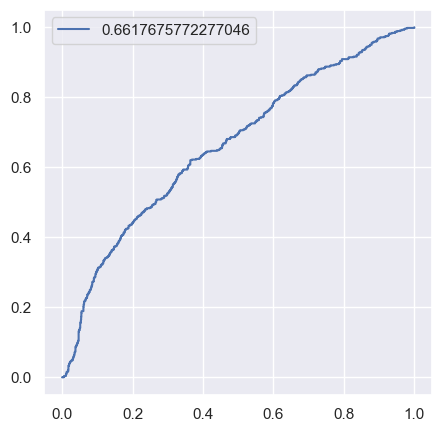

In [95]:
#selecting one of the class probabilities predicted
prob=smote_pipeline_reg.predict_proba(X_test)[:,1]
#calculating area under curve
auc=roc_auc_score(Y_test,prob)
#calculating false positive rate and true positive rate
fpr,tpr,_=roc_curve(Y_test,prob)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,label=str(auc))
plt.legend()
plt.show()

# 6) Conclusion

### Upon adressing the imbalance we can see that the ROC_AUC score drops. There is no imporvement, therefore we can assume that the model is performing better without adressing the imbalance.

### It must be noted that we could probably perform PCA and more in depth hyperparameter tuning to impove the accuracy to achieve better results.

In [98]:
#Best Predictive Model
output.head(1)

,model_name,Train Accuracy,Test Accuracy,ROC AUC score
0,(LogisticRegression(random_state=100)),0.811968,0.796971,0.843032


Text(0.5, 0.5, 'Thank You')

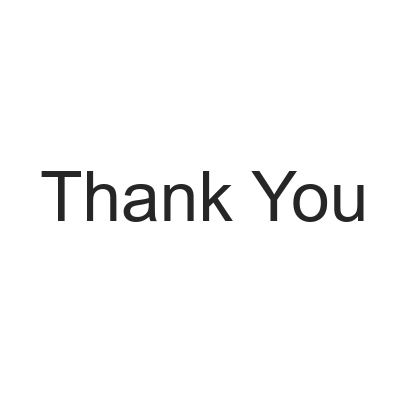

In [100]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('off')
ax.annotate('Thank You', xy=(0.5, 0.5), fontsize=50, ha='center', va='center')